**Problem Statement:**

This analysis aims to clean and explore the U.S. General Services Administration's (GSA) "Time to Hire" dataset to identify key trends in hiring duration. Specifically, it will compute measures of central tendency, dispersion, and percentiles, and visualize hiring patterns through boxplots for the three states with the highest hires to assess variability and potential outliers.

**Methodology:**

**1.	Data Cleaning & Preparation:**

o	Handle missing or inconsistent values.

o	Convert date columns (e.g., RECEIVED_DATE, HIRED_DATE) into a standard datetime format.

o	Create a "Time to Hire" metric by calculating the duration between RECEIVED_DATE and HIRED_DATE.

o	Ensure numeric columns (APPLICATION_COUNT, HIRE_COUNT) are properly formatted.

**2.	Exploratory Data Analysis (EDA):**

o	Identify states with the highest HIRE_COUNT and filter data accordingly.

o	Compute summary statistics (mean, median, mode, standard deviation).

o	Determine percentiles (25th, 50th, 75th, 99th) to understand data distribution.


**3.	Visualization**:

o	Construct boxplots for the three states with the most hires, showcasing median hiring times, interquartile ranges, and outliers.

**4.	Analysis & Interpretation:**

o	Assess hiring trends based on statistical findings.

o	Identify potential inefficiencies or outliers in the hiring process.


In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import Pandas as pd
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Github Projects/time-to-hire-data-file.xlsx'

# Load the data into a pandas DataFrame
df_tth = pd.read_excel(file_path)

# Display the first few rows of the dataset
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B


**STEP 1: DATA WRANGLING**

In [4]:
#Obtain information on the dataframe
#Ensure that date columns are in datetime format
df_tth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DEPT_DESC          6239 non-null   object        
 1   DEPT_SHORT_DESC    6239 non-null   object        
 2   VACANCY            6239 non-null   object        
 3   APPLICATION_COUNT  6239 non-null   int64         
 4   HIRE_COUNT         6239 non-null   int64         
 5   RECEIVED_DATE      6239 non-null   datetime64[ns]
 6   APPROVED_DATE      6239 non-null   datetime64[ns]
 7   OPEN_DATE          6239 non-null   datetime64[ns]
 8   CLOSE_DATE         6239 non-null   datetime64[ns]
 9   ISSUE_DATE         6239 non-null   datetime64[ns]
 10  REFERRAL_RETURNED  6239 non-null   datetime64[ns]
 11  POS_OFFERED        6239 non-null   datetime64[ns]
 12  VAC_LOCATION       6239 non-null   object        
 13  HIRED_DATE         6239 non-null   datetime64[ns]
 14  SERIES  

In [5]:
#Confirm that there are no null values
df_tth.isnull().sum()

,0
DEPT_DESC,0
DEPT_SHORT_DESC,0
VACANCY,0
APPLICATION_COUNT,0
HIRE_COUNT,0
RECEIVED_DATE,0
APPROVED_DATE,0
OPEN_DATE,0
CLOSE_DATE,0
ISSUE_DATE,0


In [6]:
#Create a new column 'TIME_TO_HIRE'
df_tth['TIME_TO_HIRE']= df_tth['HIRED_DATE'] - df_tth['RECEIVED_DATE']
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days


In [7]:
#Create a new colum 'STATE' for convience as'VAC_LOCATION' contains a lot of information
df_tth['STATE'] = df_tth['VAC_LOCATION'].astype(str).str[-2:]
df_tth.head()

,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX


In [8]:
# Create a column that is a serial number for each row
df_tth['ID'] = range(1, len(df_tth) + 1)

# Reorder columns to make 'ID' the first column
#Use List Comprehension over traditional for looping for efficiency
df_tth = df_tth[['ID'] + [col for col in df_tth.columns if col != 'ID']]

# Display the first few rows
df_tth.head()





,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
2,3,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
3,4,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,5,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13,2004-11-05,2005-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX


In [9]:
#Identify which three states have the highest amount of hires using a pivot table
df_tth.pivot_table(index = 'STATE', values = 'HIRE_COUNT', aggfunc = 'sum').sort_values(by = 'HIRE_COUNT', ascending = False)



,HIRE_COUNT
STATE,
CA,4934
TX,3735
DC,2059
MO,1678
IL,1028
...,...
ND,1
NC,1
RI,1


In [10]:
#confrim that the State column has invalid values
df_tth['STATE'].unique()

#note that the data for STATE and by extension VAC_LOCATION has some invalid vlaues such as au and ne. Ask the Data Engineer for calrification

array(['TX', 'VA', 'CO', 'DC', 'CA', 'NY', 'MD', 'ND', 'PR', 'LA', 'OK',
       'MO', 'AR', 'AL', 'GA', 'FL', 'WA', 'IL', 'WY', 'MT', 'MA', 'PA',
       'MI', 'OH', 'NJ', 'IN', 'MN', 'WI', 'HI', 'AZ', 'OP', 'ME', 'VT',
       'OA', 'NH', 'OR', 'AK', 'CT', 'NV', 'US', 'NE', 'MS', 'TN', 'WV',
       'nd', 'IA', 'au', 'SD', 'NM', 'rk', 'on', 'ea', 'ax', 'ne', 'ia',
       'UT', 'KY', 'KS', 'ID', 'n,', 'ny', 'rn', 'RI', 'co', 'NC'],
      dtype=object)

In [11]:
#Find the number of unique values in the STATE column
df_tth['STATE'].nunique()

#Given that the State column has more than 50 values (there should only be 50 as there are only 50 states) clarification is needed on the other values

65

In [12]:
df_tth.duplicated(subset=['VACANCY'], keep=False).sum()


np.int64(4855)

**There appears to be duplicates of the identification number for the vacancy. For example using .head() one can see that vacancy number 471811	is repeated 4 times and has the same data points in other columns. Using .duplicated() 4855 duplicates have been identified in the vacancy column.**

In [13]:
# Drop duplicate rows based on the 'VACANCY' column, keeping the first occurrence
df_tth = df_tth.drop_duplicates(subset=['VACANCY'], keep='first')

# Display the new DataFrame
df_tth

,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
5,6,*(TFM) Federal Sys Integ & Mgmt Ctr (ABOLISHED),CO,040057819MP,1,1,2004-10-12,2004-10-12,2004-10-13,2004-10-26,2004-11-03 00:00:00,2004-11-03,2004-11-03,"Alexandria, VA",2004-11-28,1102A,47 days,VA
6,7,(8P) Office of the Assist. Regional Administra...,8,480385,4,1,2004-09-16,2004-09-17,2004-09-17,2004-09-30,2004-10-14 00:00:00,2004-11-09,2004-11-10,"Denver [Includes Lakewood], CO",2004-11-28,0808A,73 days,CO
8,9,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y,83 days,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,6233,(7P) Office of the Assist. Regional Administra...,7,0907139CFMP,19,1,2009-10-01,2009-09-30,2009-10-02,2009-10-31,2009-11-09 15:52:00,2010-01-06,2010-01-06,"McAllen & Pharr & Edinburg Area, TX",2010-01-17,1176E,108 days,TX
6233,6234,(7P) Office of the Assist. Regional Administra...,7,1007006DRMP,116,2,2009-10-19,2009-10-20,2009-10-22,2009-11-05,2009-11-27 11:25:00,2010-01-06,2010-01-07,"Fort Worth, TX",2010-01-17,343,90 days,TX
6234,6235,(QSDAC) Southwest Supply Center,7,090710FCIP,981,1,2009-08-13,2009-08-14,2009-08-17,2009-08-31,2009-10-29 10:50:00,2009-12-03,2009-12-03,"Fort Worth, TX",2010-01-19,343,159 days,TX
6235,6236,(7P) Office of the Assist. Regional Administra...,7,0907138DRMP,20,1,2009-09-28,2009-09-29,2009-09-30,2009-10-14,2009-10-15 09:48:00,2009-12-07,2009-12-07,"New Orleans Metro Area, LA",2010-01-19,0809A,113 days,LA


In [14]:
# Reset the index
df_tth = df_tth.reset_index(drop=True)


In [15]:
 # Restart work from here
 df_tth.pivot_table(index='STATE', values='HIRE_COUNT', aggfunc='sum')\
                      .sort_values(by='HIRE_COUNT', ascending=False)\
                      .head(3)\
                      .index.tolist()

['DC', 'TX', 'MO']

In [16]:
#Create a new dataframe since I am only working with the top 3 states

#Create a pivot table of the top 3 states and assgin the value top_3_states
top_3_states = df_tth.pivot_table(index='STATE', values='HIRE_COUNT', aggfunc='sum')\
                      .sort_values(by='HIRE_COUNT', ascending=False)\
                      .head(3)\
                      .index.tolist()

#Filter and subset the df_tth DataFrame to keep only the top 3 states and assign the value df_top_3
df_top_3 = df_tth[df_tth['STATE'].isin(top_3_states)]

# Display the new DataFrame
df_top_3


,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE
0,1,(7P) Office of the Assist. Regional Administra...,7,471551,38,1,2004-08-18,2004-08-19,2004-08-19,2004-09-17,2004-10-01 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0301AU,88 days,TX
1,2,(7P) Office of the Assist. Regional Administra...,7,471811,9,1,2004-09-17,2004-09-20,2004-09-20,2004-10-04,2004-10-13 00:00:00,2004-11-05,2004-11-05,"Fort Worth, TX",2004-11-14,0343B,58 days,TX
4,9,(7P) Office of the Assist. Regional Administra...,7,471321,79,1,2004-09-06,2004-09-07,2004-09-07,2004-09-28,2004-10-13 00:00:00,2004-11-16,2004-11-16,"Fort Worth, TX",2004-11-28,0301Y,83 days,TX
5,10,(7P) Office of the Assist. Regional Administra...,7,471821,57,1,2004-09-15,2004-09-16,2004-09-16,2004-10-04,2004-10-18 00:00:00,2004-11-02,2004-11-04,"Fort Worth, TX",2004-11-29,1102F,75 days,TX
6,18,(XCM) Program Support Division,CO,050004301MP,2,1,2004-11-05,2004-11-05,2004-11-23,2004-12-07,2004-12-09 00:00:00,2004-12-09,2004-12-09,"Washington DC Metro Area, DC",2004-12-10,2210B,35 days,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,6231,(WPG) Potomac Services Division,N,WP3PSPB286MP09,21,1,2009-08-26,2009-10-07,2009-10-16,2009-10-29,2010-01-06 09:20:00,2009-01-13,2010-01-13,"Washington DC Metro Area, DC",2010-01-13,1176P,140 days,DC
2204,6232,(QSDAC) Southwest Supply Center,7,1007027DMMP,5,1,2009-12-08,2009-12-09,2009-12-10,2009-12-28,2010-01-05 10:43:00,2009-01-12,2009-01-12,"Fort Worth, TX",2010-01-17,2010C,40 days,TX
2205,6233,(7P) Office of the Assist. Regional Administra...,7,0907139CFMP,19,1,2009-10-01,2009-09-30,2009-10-02,2009-10-31,2009-11-09 15:52:00,2010-01-06,2010-01-06,"McAllen & Pharr & Edinburg Area, TX",2010-01-17,1176E,108 days,TX
2206,6234,(7P) Office of the Assist. Regional Administra...,7,1007006DRMP,116,2,2009-10-19,2009-10-20,2009-10-22,2009-11-05,2009-11-27 11:25:00,2010-01-06,2010-01-07,"Fort Worth, TX",2010-01-17,343,90 days,TX


In [17]:
#Confirm what the top three States are
df_top_3['STATE'].unique()

array(['TX', 'DC', 'MO'], dtype=object)

In [18]:
#confirm the amount of years the dataset spans for the top three states by subtracting the earliest RECEIVED_DATE from the latest the HIRED_DATE
data_timespan = df_top_3['HIRED_DATE'].max() - df_top_3['RECEIVED_DATE'].min()
print(data_timespan)


1980 days 00:00:00


In [19]:
#Convert the data time span to years
data_timespan_years = data_timespan.days / 365
print(data_timespan_years)

5.424657534246576


In [20]:
beginning_year = df_top_3['RECEIVED_DATE'].dt.year.min()  # earliest year from RECEIVED_DATE
end_year = df_top_3['HIRED_DATE'].dt.year.max()  # latest year from HIRED_DATE

# Output the result
print(f"The data spans from {beginning_year} to {end_year}.")

The data spans from 2004 to 2010.


In [21]:
# Convert TIME_TO_HIRE from timedelta to days for the Box Plots that will be made later on
df_top_3['TIME_TO_HIRE'] = df_top_3['TIME_TO_HIRE'].dt.days

/tmp/ipython-input-21-2050858119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['TIME_TO_HIRE'] = df_top_3['TIME_TO_HIRE'].dt.days


In [22]:
#confirm the conversion of TIME_TO_HIRE from timedelta to day
df_top_3['TIME_TO_HIRE'].dtype


dtype('int64')

**FROM DATA CLEANING TO INSIGHT DISCOVERY**

With the dataset now cleaned and structured—duplicates removed, date fields standardized, and key metrics such as “Time to Hire” calculated - the analysis is well-positioned to begin exploring the underlying trends and patterns. The next phase of this analysis focuses on uncovering insights through summary statistics and visualizations. Specifically, I  examine how hiring durations vary across locations, identify the states with the highest hiring activity, and use descriptive measures to highlight central tendencies, variability, and potential outliers in the hiring process.

**STEP 2: EXPLORATORY DATA ANALYSIS (EDA)**

**STATE LEVEL HIRING ANALYSIS**

After examining overall patterns in hiring duration, we now zoom in on state-level trends. Analyzing the top three hiring states—Missouri, Texas, and Washington, D.C.—allowed me to compare how hiring practices and timelines vary across locations. This step includes summary statistics, anomaly detection, and standard error calculations to assess data quality and interpretability at the state level.

**MISSOURI SUMMARY STATISTICS**


In [23]:
#Create summary statistics using .describe()
mo_summary_th = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
mo_summary_th['mode'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
mo_summary_th['range'] =  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].min()
mo_summary_th['median'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
mo_summary_th = mo_summary_th.to_frame().reset_index()
mo_summary_th.columns = ['Missouri Summary Statistics: Time to hire', 'Value (Days)']
mo_summary_th

,Missouri Summary Statistics: Time to hire,Value (Days)
0,count,276.0
1,mean,69.586957
2,std,51.877019
3,min,-263.0
4,25%,44.0
5,50%,64.5
6,75%,91.0
7,max,425.0
8,mode,[62]
9,range,688


**The dataframe above indicates that there is a negative value that is assigned to the shortes time to hire in Missouri, which does not make sense as time cannot be negative in this context. I will work to find and remove this value**.

In [24]:
# Remove the row where TIME_TO_HIRE is -263 and STATE is 'MO'
df_top_3 = df_top_3.loc[~((df_top_3['STATE'] == 'MO') & (df_top_3['TIME_TO_HIRE'] == -263))]

In [25]:
# Confirm that any row with -263 has been removed
df_top_3[(df_top_3['STATE'] == 'MO') & (df_top_3['TIME_TO_HIRE'] == -263)]

,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE


In [26]:
#Create summary statistics using .describe()
mo_summary_th = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
mo_summary_th['mode'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
mo_summary_th['range'] =  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].min()
mo_summary_th['median'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
mo_summary_th = mo_summary_th.to_frame().reset_index()
mo_summary_th.columns = ['Missouri Summary Statistics: Time to hire', 'Value (Days)']
mo_summary_th

,Missouri Summary Statistics: Time to hire,Value (Days)
0,count,275.0
1,mean,70.796364
2,std,47.915322
3,min,-243.0
4,25%,44.0
5,50%,65.0
6,75%,91.0
7,max,425.0
8,mode,[62]
9,range,668


**Another minimum time to hire contains another negative value.**

In [27]:
# Remove all rows where TIME_TO_HIRE is negative and STATE is 'MO'
df_top_3 = df_top_3.loc[~((df_top_3['STATE'] == 'MO') & (df_top_3['TIME_TO_HIRE'] < 0))]


In [28]:
# Confirm that any row with a negative value has been removed
df_top_3[(df_top_3['STATE'] == 'MO') & (df_top_3['TIME_TO_HIRE'] < 0)]

,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE


In [29]:
df_top_3 = df_top_3.reset_index(drop=True)

In [30]:
#Create summary statistics using .describe()
mo_summary_th = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
mo_summary_th['mode'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
mo_summary_th['range'] =  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].min()
mo_summary_th['median'] = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
mo_summary_th = mo_summary_th.to_frame().reset_index()
mo_summary_th.columns = ['Missouri Summary Statistics: Time to hire', 'Value (Days)']
mo_summary_th

,Missouri Summary Statistics: Time to hire,Value (Days)
0,count,274.0
1,mean,71.941606
2,std,44.071332
3,min,11.0
4,25%,44.0
5,50%,65.0
6,75%,91.0
7,max,425.0
8,mode,[62]
9,range,414


In [31]:

mo_sum_hc = df_top_3[df_top_3['STATE'] == 'MO']['HIRE_COUNT'].sum()
print(mo_sum_hc)


357


**DC SUMMARY STATISTICS**

In [32]:
#Create summary statistics using .describe()
dc_summary_th = df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
dc_summary_th['mode'] = df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
dc_summary_th['range'] =  df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].min()
dc_summary_th['median'] = df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
dc_summary_th = dc_summary_th.to_frame().reset_index()
dc_summary_th.columns = ['DC Summary Statistics: Time to Hire', 'Value (Days)']
dc_summary_th

,DC Summary Statistics: Time to Hire,Value (Days)
0,count,597.0
1,mean,92.530988
2,std,64.847507
3,min,4.0
4,25%,50.0
5,50%,80.0
6,75%,116.0
7,max,583.0
8,mode,[62]
9,range,579


In [33]:
dc_sum_hc = df_top_3[df_top_3['STATE'] == 'DC']['HIRE_COUNT'].sum()
print(dc_sum_hc)


736


**TEXAS SUMMARY STATISTIC**

In [34]:
#Create summary statistics using .describe()
tx_summary_hc = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
tx_summary_hc['mode'] = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
tx_summary_hc['range'] =  df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].min()
tx_summary_hc['median'] = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
tx_summary_hc = tx_summary_hc.to_frame().reset_index()
tx_summary_hc.columns = ['Texas Summary Statistics: Time to Hire', 'Value (Days)']
tx_summary_hc



,Texas Summary Statistics: Time to Hire,Value (Days)
0,count,330.0
1,mean,86.460606
2,std,48.691386
3,min,-213.0
4,25%,55.75
5,50%,76.0
6,75%,104.0
7,max,292.0
8,mode,[60]
9,range,505


The dataframe above indicates that there is a negative value that is assigned to the shortes time to hire in Texas, which does not make sense as time cannot be negative in this context. I will work to find and remove this value.

In [35]:
# Remove the row where TIME_TO_HIRE is -213 and STATE is 'TX'
df_top_3 = df_top_3.loc[~((df_top_3['STATE'] == 'TX') & (df_top_3['TIME_TO_HIRE'] == -213))]


In [36]:
# Confirm that any row with -213 has been removed
df_top_3[(df_top_3['STATE'] == 'TX') & (df_top_3['TIME_TO_HIRE'] == -213)]


,ID,DEPT_DESC,DEPT_SHORT_DESC,VACANCY,APPLICATION_COUNT,HIRE_COUNT,RECEIVED_DATE,APPROVED_DATE,OPEN_DATE,CLOSE_DATE,ISSUE_DATE,REFERRAL_RETURNED,POS_OFFERED,VAC_LOCATION,HIRED_DATE,SERIES,TIME_TO_HIRE,STATE


In [37]:
# Reset the Index After Dropping Rows
df_top_3 = df_top_3.reset_index(drop=True)


In [38]:
#Create summary statistics using .describe()
tx_summary_hc = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].describe()

# Add mode, range, and median
tx_summary_hc['mode'] = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].mode().tolist() #use.tolist() incase there is more than one mode
tx_summary_hc['range'] =  df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].max() -  df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].min()
tx_summary_hc['median'] = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].median()

#make the output a dataframe for aestheticism and professional presentation
tx_summary_hc = tx_summary_hc.to_frame().reset_index()
tx_summary_hc.columns = ['Texas Summary Statistics: Time to Hire', 'Value (Days)']
tx_summary_hc


,Texas Summary Statistics: Time to Hire,Value (Days)
0,count,329.0
1,mean,87.370821
2,std,45.867677
3,min,19.0
4,25%,58.0
5,50%,76.0
6,75%,104.0
7,max,292.0
8,mode,[60]
9,range,273


In [39]:
tx_sum_hc = df_top_3[df_top_3['STATE'] == 'TX']['HIRE_COUNT'].sum()
print(tx_sum_hc)

452


**STANDARD ERROR**

Given the presence of duplicates in the original dataset and the inability to verify the exact methods of data collection and formatting, it is prudent to treat the final cleaned datasets for Missouri (MO), Texas (TX), and Washington, D.C. (DC) as random samples drawn from each state's full population of hiring events between 2004 and 2010.

To assess the reliability of the statistical estimates derived from these samples, the standard error of the mean (SEM) will be calculated for each state. The standard error provides an indication of how much the sample mean "Time to Hire" is expected to vary from the true population mean. A smaller standard error suggests that the sample mean is a more precise and reliable estimate of the underlying population mean, while a larger standard error indicates greater uncertainty. Incorporating the standard error into the analysis serves as a safeguard, helping to contextualize the precision and generalizability of conclusions drawn from the cleaned datasets.

In [40]:
#Standard error of the time to hire in Missouri
stderr_mo = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE'].sem()

print(stderr_mo)


2.6624465259133214


**If many random samples were taken from Missouri's hiring data, the sample means would be expected to vary, on average, by about 2.66 days around the true population mean. Given this relatively low standard error of the mean (SEM), the sample utilized in this project is considered acceptable and sufficiently representative of the population. Therefore, it can reasonably be used to draw inferences about hiring times in Missouri.**

In [41]:
#Standard error of the time to hire in DC
stderr_dc = df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE'].sem()

print(stderr_dc)


2.6540317681745056


**If many random samples were taken from DC's hiring data, the sample means would be expected to vary, on average, by about 2.65 days around the true population mean. Given this relatively low standard error of the mean (SEM), the sample utilized in this project is considered acceptable and sufficiently representative of the population. Therefore, it can reasonably be used to draw inferences about hiring times in DC.**

In [42]:
#Standard error of the time to hire in TX
stderr_tx = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE'].sem()

print(stderr_tx)

2.5287668824240774


**If many random samples were taken from TX's hiring data, the sample means would be expected to vary, on average, by about 2.52 days around the true population mean. Given this relatively low standard error of the mean (SEM), the sample utilized in this project is considered acceptable and sufficiently representative of the population. Therefore, it can reasonably be used to draw inferences about hiring times in TX.**

**STEP 3 VISUALIZING HIRING PATTERNS**

**BOX PLOT**: **TIME TO HIRE 2004 to 2010**

To complement the statistical analysis, i now visualize the distribution of time-to-hire across the three states with the highest number of hires. Boxplots provide a clear picture of median values, interquartile ranges, and potential outliers—making it easier to identify inconsistencies or inefficiencies in the hiring process across locations.


/tmp/ipython-input-43-1745035190.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ca_data, dc_data, tx_data], vert=True, patch_artist=True,


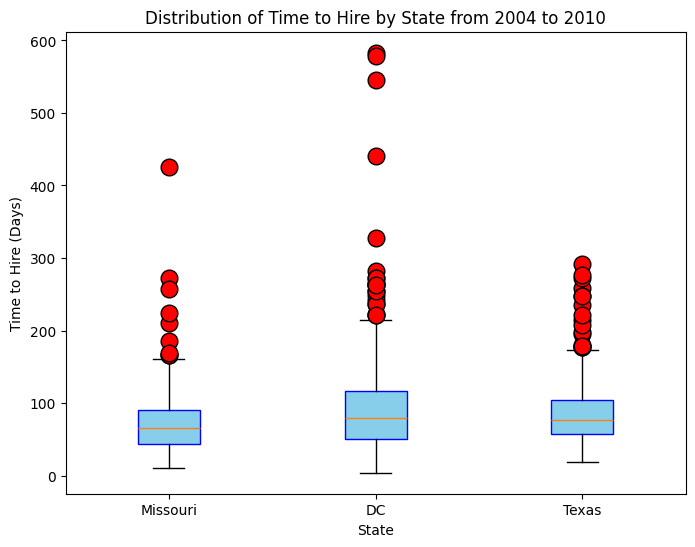

In [43]:
import matplotlib.pyplot as plt

# Filter the data for each state
ca_data = df_top_3[df_top_3['STATE'] == 'MO']['TIME_TO_HIRE']
dc_data = df_top_3[df_top_3['STATE'] == 'DC']['TIME_TO_HIRE']
tx_data = df_top_3[df_top_3['STATE'] == 'TX']['TIME_TO_HIRE']

# Create a large enough box plot for all three states, side by side
plt.figure(figsize=(8, 6))

# Plot the box plots side by side
plt.boxplot([ca_data, dc_data, tx_data], vert=True, patch_artist=True,
            labels=['Missouri', 'DC', 'Texas'],
            boxprops=dict(facecolor='skyblue', color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=12))

# Add title and labels
plt.title('Distribution of Time to Hire by State from 2004 to 2010')
plt.ylabel('Time to Hire (Days)')
plt.xlabel('State')

# Show the plot
plt.show()




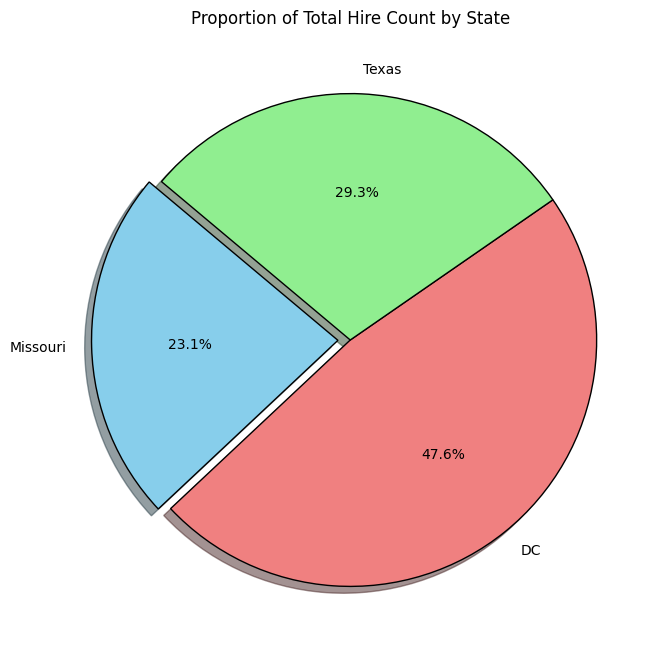

In [44]:
import matplotlib.pyplot as plt

# Data for the pie chart
data = [mo_sum_hc, dc_sum_hc, tx_sum_hc]
labels = ['Missouri', 'DC', 'Texas']
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black'}, explode=[0.05, 0, 0], shadow=True)

# Add title
plt.title('Proportion of Total Hire Count by State')

# Show the plot
plt.show()




**Comparative Analysis of Hiring Timelines Across States**

**Descriptive Statistics**

**Missouri**

• **Mean Time to Hire:** 71.94 days

•	**Median:** 65 days

•	**Mode:** 62 days

•	**Standard Deviation:** 44.07 days

**Texas**

•	**Mean Time to Hire:** 87.37 days

•	**Median:** 76 days

•	**Mode:** 60 days

•	**Standard Deviation:** 45.87 days

**Washington D.C.**

•	**Mean Time to Hire:** 92.53 days

•	**Median:** 80 days

•	**Mode:** 62 days

•	**Standard Deviation:** 64.84 days

**Interpretation and Statistical Insights**

**FINAL ANALYSIS**

Over the span of 5.4 years, Washington D.C. has recorded the highest number of hires (736), followed by Texas (452) and Missouri (357). The higher hiring volume in Washington D.C. suggests either a greater demand for talent, a larger number of available positions compared to Texas and Missouri, or stronger hiring trends, possibly driven by high demand, high turnover, or both.However, because the dataset represents a cleaned sample rather than a complete population, comparisons of absolute hiring volumes across states should be interpreted with caution. Differences in sample size, data cleaning decisions, and potential sampling bias may affect the representativeness of these figures.

Ideally, the dataset for an analysis like this would have represented the full population. Due to the presence of duplicates and their removal, fewer than 1,000 hires were recorded in each state over the five-year period, raising concerns about completeness. Upon careful examination, the duplicates appeared to be true duplicates rather than distinct positions. As the dataset lacked sufficient documentation, and given that the vacancy numbers were identical, the decision was made to treat these entries as duplicates and remove them.

Had it been possible to consult the data engineer, I would have sought clarification on the nature of the duplicates. It is possible, for instance, that some duplicates in Texas represented different roles within the same city. However, given the lack of supporting evidence, and to preserve data integrity, the duplicates were removed.

Following this cleaning process, the final data for each of the top three states was treated as a random sample. To assess the reliability of drawing inferences from this sample, the Standard Error of the Mean (SEM) for time to hire was calculated for each state. The low SEM values suggest that the sample means are close approximations of the true population means, thereby making it justifiable to use the sample data for inferential analysis of hiring times.


**Interpretation and Statistical Insights**

An examination of the central tendencies reveals that Missouri has the most efficient hiring process, with the shortest average (71.94 days), median (65 days), and lowest variability (SD = 44.07 days). In contrast, Washington D.C. exhibits the longest hiring durations, with an average of 92.53 days and a considerably higher standard deviation of 64.84 days, indicating more volatility and possible inefficiencies in the process. Texas falls between the two, with a mean of 87.37 days and moderate dispersion.

In all three states, the mean exceeds the median, which in turn exceeds the mode — a pattern consistent with positively skewed distributions. This suggests that while most hiring occurs relatively quickly (around the mode or median), there are a number of high-duration outliers that pull the average upward. This is corroborated by box plots constructed for each state, which display extended right-side whiskers and occasional extreme values.

**Identification of Potential Inefficiencies and Outliers**

The positive skewness observed in each state implies the presence of long-tail hiring durations, which may signal process inefficiencies or exceptional cases such as delays in approvals, hard-to-fill roles, or administrative bottlenecks.

•	In Washington D.C., the high standard deviation (64.84 days) and long right tail suggest significant inconsistency, with some hiring durations potentially exceeding 150 days. These outliers merit closer inspection to identify recurring causes.

•	Texas shows a similar pattern, albeit with slightly less variability. The relatively high average compared to the mode indicates that a few prolonged hires may be disproportionately affecting the overall performance.

•	Missouri, though comparatively more efficient, is not without inefficiencies. The spread of 44.07 days and positive skew suggests that a subset of cases still takes considerably longer than average, which could be improved through process standardization.

**Conclusion**

While Missouri demonstrates the most efficient and consistent hiring timeline, all three states exhibit signs of positive skewness and long-duration outliers, which point to underlying inefficiencies. These may be opportunities for targeted process improvement initiatives such as improved recruitment tracking, automation of approvals, or faster background checks. Identifying and addressing the root causes behind the longest hiring cases could significantly reduce overall hiring timelines and improve organizational agility.

**Disclaimer**

It is important to acknowledge certain limitations in the dataset that may affect the interpretation and generalizability of this analysis. The original dataset included numerous duplicate entries whose purpose or origin was not clearly documented. While these duplicates were removed to ensure data integrity, their unexplained presence introduces uncertainty regarding the completeness and accuracy of the cleaned data.

Additionally, the methodology behind the collection and formatting of the dataset was not fully disclosed, which limits the ability to assess potential biases, sampling methods, or data validation procedures. Had it been possible to consult the dataset's creators or data engineers, clarifications regarding the nature of the duplicates and the structure of the data could have significantly enhanced the reliability of the findings.

Therefore, while the analysis provides valuable insights into hiring patterns across Missouri, Texas, and Washington D.C., the results should be interpreted with caution. Until further information is made available about the dataset's origins and composition, any conclusions drawn must be viewed as provisional and exploratory, rather than definitive.



**STEP 4: Key Findings and Recommendations**

**Summary of Key Insights**

- This analysis of the U.S. General Services Administration’s “Time to Hire” data (2004–2010) reveals several meaningful trends:

- Time-to-hire durations vary significantly across states, with Missouri, Texas, and Washington, D.C. showing differences in central tendency and dispersion.

- Missouri and Texas exhibited relatively consistent hiring timelines, with fewer extreme outliers, suggesting a more standardized hiring process.

- Washington, D.C. showed greater variability and more outliers in time to hire, possibly indicating administrative bottlenecks or inconsistent procedures.

- Negative time-to-hire values were found and removed, signaling data quality issues that required preprocessing and underscore the importance of validation in workforce analytics.

- Standard error calculations support the statistical reliability of the cleaned state-specific samples, allowing cautious generalization of insights.

**Business Implications**

- Improving hiring efficiency in regions with higher variability (e.g., D.C.) could lead to faster onboarding and better resource utilization.

- Standardizing hiring timelines across departments and geographies may help create a more equitable and predictable candidate experience.

- Data cleaning and audit mechanisms should be embedded into future hiring data collection systems to ensure consistency and accuracy.

**Recommendations for Further Analysis**

- Time Trends: Investigate how time to hire has evolved over the years to identify if improvements or regressions occurred over time.

- Departmental Analysis: Break down hiring durations by department or job type to identify structural inefficiencies.

- Predictive Modeling: Use regression or classification models to predict long vs. short hiring durations based on application count, vacancy location, or department.

- Cost Impact: Estimate the potential cost savings associated with reducing average time to hire.